In [1]:
import numpy
import pandas
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import seaborn

In [2]:
plt.rcParams['figure.figsize'] = 16, 9

In [3]:
df = pandas.read_csv('gp.csv', header=0)

In [4]:
df.to_dense

<bound method DataFrame.to_dense of     Jahr      Zeit                                               Link
0   2017   1:14:14  http://bern.mikatiming.de/2017/?content=detail...
1   2016  01:13:35  http://bern.mikatiming.de/2016/?content=detail...
2   2015  01:13:57  http://bern.mikatiming.de/2015/?content=detail...
3   2014  01:14:55  http://bern.mikatiming.de/2014/?content=detail...
4   2013  01:15:59  http://bern.mikatiming.de/2013/?content=detail...
5   2012  01:11:42  http://bern.mikatiming.de/2012/?content=detail...
6   2011       NaN  http://bern.mikatiming.de/2011/?content=detail...
7   2010       NaN                                                NaN
8   2009   1:12:39  http://bern.mikatiming.de/2009/?content=detail...
9   2008       NaN                                                NaN
10  2007  01:12:03                                                NaN
11  2006  01:03:55  https://services.datasport.com/2006/lauf/gp/al...
12  2005  01:11:22  https://services.datasport.com/200

In [5]:
df['Zeit']  = pandas.to_timedelta(df['Zeit']) / numpy.timedelta64(1, 'h')

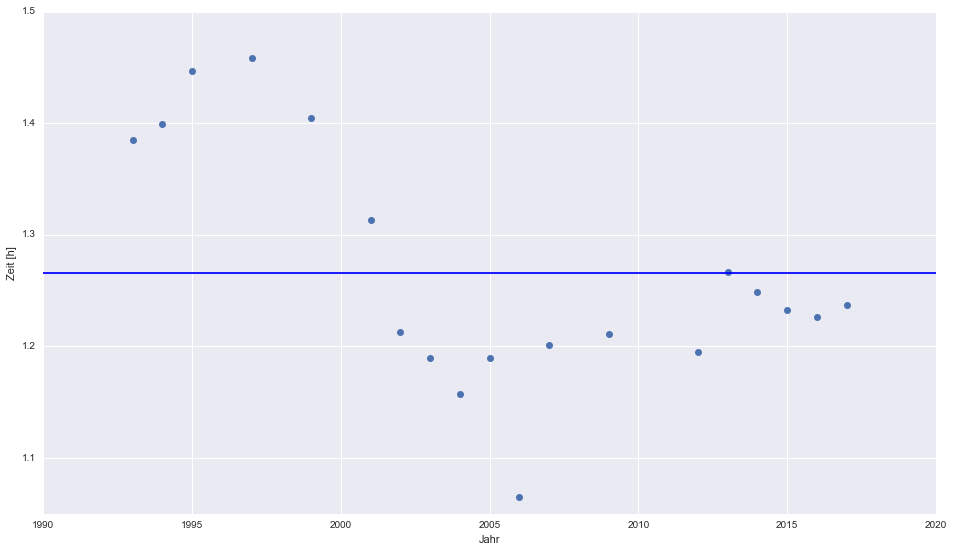

In [6]:
plt.plot(df['Jahr'], df['Zeit'], ls='', marker='o')
plt.axhline(numpy.nanmean(df['Zeit']))
plt.xlabel('Jahr')
plt.ylabel('Zeit [h]')
plt.show()

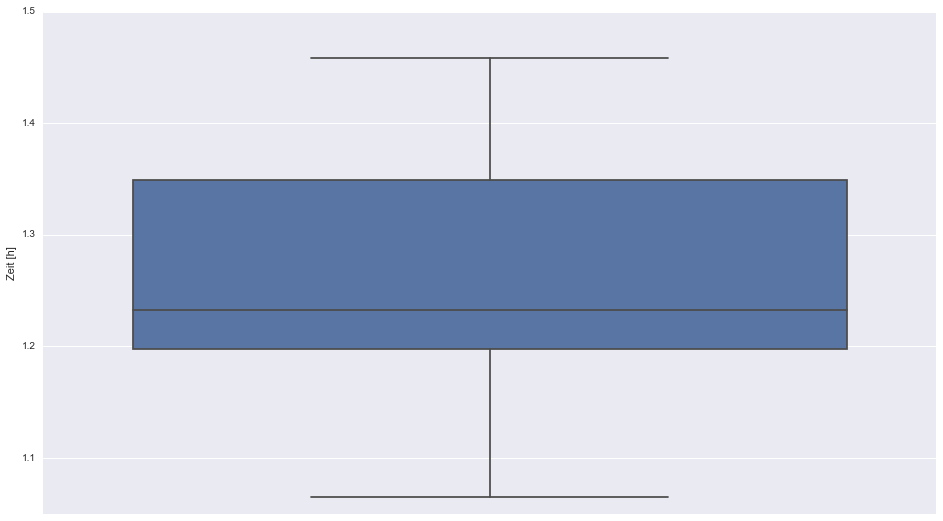

In [7]:
seaborn.boxplot(df['Zeit'], orient='v')
plt.ylabel('Zeit [h]')
plt.show()